In [119]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt


In [120]:
file_path = 'weather.csv'
df = pd.read_csv(file_path)
# wcczytywanie pliku

In [121]:
print(df.info())
print(df.describe())
# info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Location       366 non-null    object 
 2   MinTemp        366 non-null    float64
 3   MaxTemp        366 non-null    float64
 4   Rainfall       366 non-null    float64
 5   Evaporation    366 non-null    float64
 6   Sunshine       363 non-null    float64
 7   WindGustDir    363 non-null    object 
 8   WindGustSpeed  364 non-null    float64
 9   WindDir9am     335 non-null    object 
 10  WindDir3pm     365 non-null    object 
 11  WindSpeed9am   359 non-null    float64
 12  WindSpeed3pm   366 non-null    int64  
 13  Humidity9am    366 non-null    int64  
 14  Humidity3pm    366 non-null    int64  
 15  Pressure9am    366 non-null    float64
 16  Pressure3pm    366 non-null    float64
 17  Cloud9am       366 non-null    int64  
 18  Cloud3pm  

In [122]:
# Sprawdzenie brakujących wartosci
missing_values = df.isna().sum()
print(missing_values)

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [61]:
df.drop(columns=['RISK_MM'], inplace=True, errors='ignore')
# Usunięcie kolumny RISK_MM

In [38]:
features = ["MinTemp","MaxTemp","Rainfall","Evaporation",
            "Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm",
            "WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am",
            "Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]

target = 'RainTomorrow'
# wybieranie kolumn

In [39]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['WindGustDir'] = pd.factorize(df['WindGustDir'])[0]
df['WindDir9am'] = pd.factorize(df['WindDir9am'])[0]
df['WindDir3pm'] = pd.factorize(df['WindDir3pm'])[0]
# Zamiana na cyfrowe fartości

In [123]:
print(df.info())
print(df.describe())
# sprawdzanie

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Location       366 non-null    object 
 2   MinTemp        366 non-null    float64
 3   MaxTemp        366 non-null    float64
 4   Rainfall       366 non-null    float64
 5   Evaporation    366 non-null    float64
 6   Sunshine       363 non-null    float64
 7   WindGustDir    363 non-null    object 
 8   WindGustSpeed  364 non-null    float64
 9   WindDir9am     335 non-null    object 
 10  WindDir3pm     365 non-null    object 
 11  WindSpeed9am   359 non-null    float64
 12  WindSpeed3pm   366 non-null    int64  
 13  Humidity9am    366 non-null    int64  
 14  Humidity3pm    366 non-null    int64  
 15  Pressure9am    366 non-null    float64
 16  Pressure3pm    366 non-null    float64
 17  Cloud9am       366 non-null    int64  
 18  Cloud3pm  

In [125]:
missing_values = df.isna().sum()
print(missing_values)
# Sprawdzanie na brakujące wartosci

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [42]:
num_imputer = SimpleImputer(strategy='median')
df[features] = num_imputer.fit_transform(df[features])
# Usuwanie ewentualnych NaN

In [43]:
knn_imputer = KNNImputer(n_neighbors=5)
df[features] = knn_imputer.fit_transform(df[features])
# Uruchamiać opcjonalnie daje w zasadzie takie same wyniki

In [44]:
missing_values = df.isna().sum()
print(missing_values)
# Nie zostało NaN

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [45]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Przygotowanie danych

Porównanie kilku modeli o ocenianie ich na podstawie dokładności na zbiorach testowych i treningowych, AUC

Decision Tree
Accuracy: 0.7027027027027027
Precyzja na zbiorze treningowym
1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        61
           1       0.30      0.54      0.39        13

    accuracy                           0.70        74
   macro avg       0.59      0.64      0.60        74
weighted avg       0.78      0.70      0.73        74



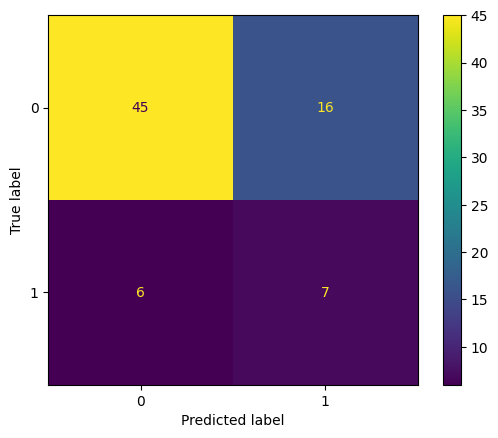

In [107]:
# Testowanie i opisywanie różnych modeli
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precyzja na zbiorze treningowym")
print(accuracy_score(y_train, model.predict(X_train)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
dtr = model


RandomForestClassifier
Accuracy: 0.8648648648648649
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        61
           1       0.71      0.38      0.50        13

    accuracy                           0.86        74
   macro avg       0.80      0.68      0.71        74
weighted avg       0.85      0.86      0.85        74



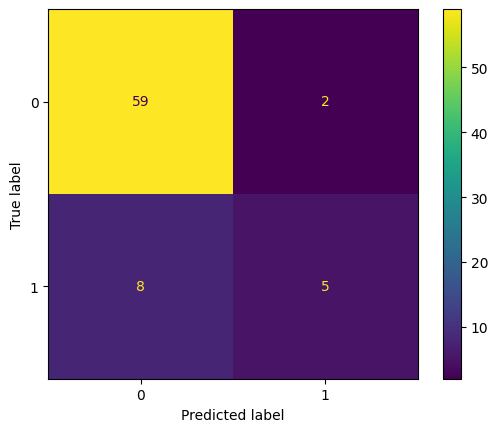

In [74]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:")

print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()

rfc = model

Gradient Boosting
Accuracy: 0.8108108108108109
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        61
           1       0.47      0.54      0.50        13

    accuracy                           0.81        74
   macro avg       0.68      0.70      0.69        74
weighted avg       0.82      0.81      0.82        74



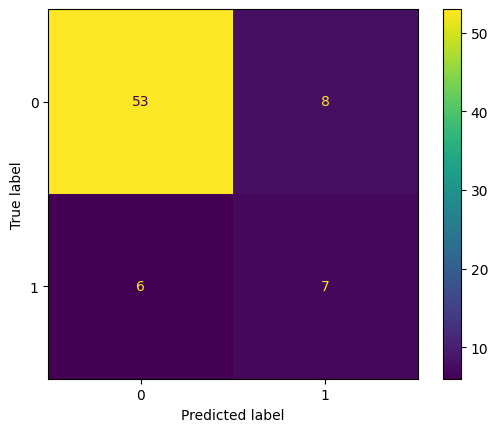

In [99]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")

print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
gdc = model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.8783783783783784
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        61
           1       0.62      0.77      0.69        13

    accuracy                           0.88        74
   macro avg       0.79      0.84      0.81        74
weighted avg       0.89      0.88      0.88        74



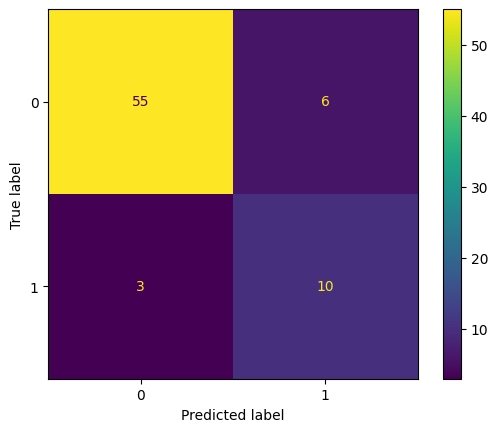

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
lr = model

KNN
Accuracy: 0.8783783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        61
           1       1.00      0.31      0.47        13

    accuracy                           0.88        74
   macro avg       0.94      0.65      0.70        74
weighted avg       0.89      0.88      0.85        74



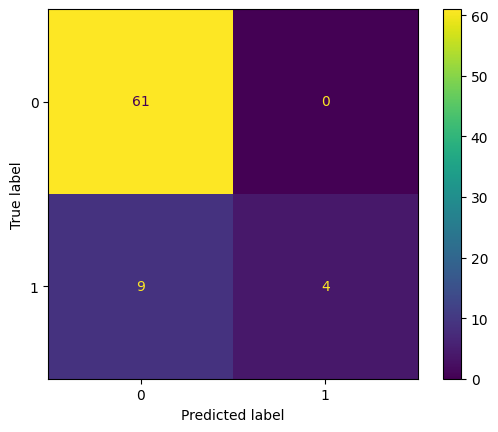

In [126]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")

print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
knn = model

Perceptron
Accuracy: 0.8378378378378378
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        61
           1       0.56      0.38      0.45        13

    accuracy                           0.84        74
   macro avg       0.72      0.66      0.68        74
weighted avg       0.82      0.84      0.83        74



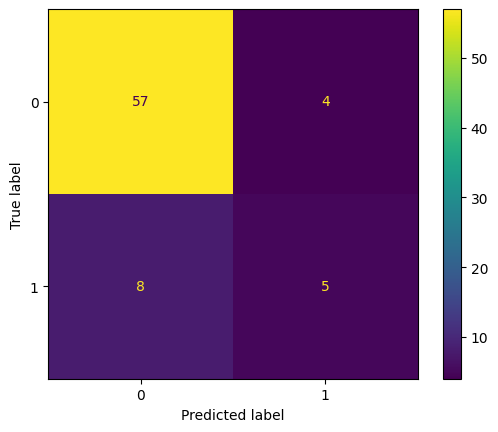

In [127]:
model = Perceptron(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Perceptron")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")

print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
per = model

Naive Bayes
Accuracy: 0.8108108108108109
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        61
           1       0.48      0.77      0.59        13

    accuracy                           0.81        74
   macro avg       0.71      0.79      0.73        74
weighted avg       0.86      0.81      0.83        74



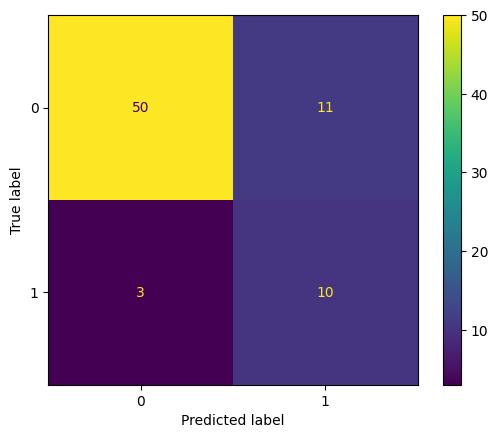

In [79]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")

print(classification_report(y_test, y_pred))

y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
gnb = model

In [118]:
dtr_auc = roc_auc_score(y_train, dtr.predict_proba(X_train)[:, 1])
rfc_auc = roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])
gdc_auc = roc_auc_score(y_train, gdc.predict_proba(X_train)[:, 1])
lr_auc = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
knn_auc = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
per_auc = roc_auc_score(y_train, per.decision_function(X_train))
gnb_auc = roc_auc_score(y_train, gnb.predict_proba(X_train)[:, 1])
print("Decision Tree AUC:", dtr_auc)
print("Random Forest AUC:", rfc_auc)
print("Gradient Boosting AUC:", gdc_auc)
print("Logistic Regression AUC:", lr_auc)
print("KNN AUC:", knn_auc)
print("Perceptron AUC:", per_auc)
print("Naive Bayes AUC:", gnb_auc)

Decision Tree AUC: 1.0
Random Forest AUC: 0.9863424646719824
Gradient Boosting AUC: 1.0
Logistic Regression AUC: 0.9000552617036394
KNN AUC: 0.9355411699692113
Perceptron AUC: 0.804136733243862
Naive Bayes AUC: 0.8755822215204864


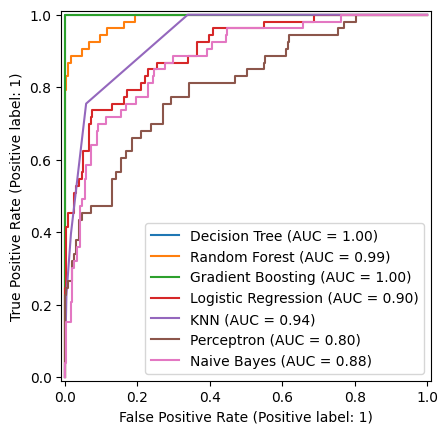

In [111]:
RocCurveDisplay.from_estimator(dtr, X_train, y_train, name="Decision Tree")
RocCurveDisplay.from_estimator(rfc, X_train, y_train, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_estimator(gdc,  X_train, y_train, name="Gradient Boosting", ax=plt.gca())
RocCurveDisplay.from_estimator(lr,  X_train, y_train, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_estimator(knn,  X_train, y_train, name="KNN", ax=plt.gca())
RocCurveDisplay.from_estimator(per,  X_train, y_train, name="Perceptron", ax=plt.gca())
RocCurveDisplay.from_estimator(gnb,  X_train, y_train, name="Naive Bayes", ax=plt.gca())
plt.legend()
plt.show()
# Krzywe ROC

In [112]:
print("DecisionTreeClassifier")
print("Dokładność na zbiorze testowym")
print(accuracy_score(y_test, dtr.predict(X_test)))
print("Dokładność na zbiorze treningowym")
print(accuracy_score(y_train, dtr.predict(X_train)))
print("Dokładność na zbiorze treningowym")

print("RandomForestClassifier")
print("Dokładność na zbiorze testowym")
print(accuracy_score(y_test, rfc.predict(X_test)))
print("Dokładność na zbiorze treningowym")
print(accuracy_score(y_train, rfc.predict(X_train)))

print("GradientBoostingClassifier")
print("Dokładność na zbiorze testowym")
print(accuracy_score(y_test, gdc.predict(X_test)))
print("Dokładność na zbiorze treningowym")
print(accuracy_score(y_train, gdc.predict(X_train)))

print("LogisticRegression")
print("Dokładność na zbiorze testowym")
print(accuracy_score(y_test, lr.predict(X_test)))
print("Dokładność na zbiorze treningowym")
print(accuracy_score(y_train, lr.predict(X_train)))

print("KNeighborsClassifier")
print("Dokładność na zbiorze testowym")
print(accuracy_score(y_test, knn.predict(X_test)))
print("Dokładność na zbiorze treningowym")
print(accuracy_score(y_train, knn.predict(X_train)))


print("Perceptron")
print("Dokładność na zbiorze testowym")
print(accuracy_score(y_test, per.predict(X_test)))
print("Dokładność na zbiorze treningowym")
print(accuracy_score(y_train, per.predict(X_train)))


print("Naive Bayes")
print("Precyzja na zbiorze testowym")
print(accuracy_score(y_test, gnb.predict(X_test)))
print("Precyzja na zbiorze treningowym")
print(accuracy_score(y_train, gnb.predict(X_train)))




DecisionTreeClassifier
Dokładność na zbiorze testowym
0.7027027027027027
Dokładność na zbiorze treningowym
1.0
Dokładność na zbiorze treningowym
RandomForestClassifier
Dokładność na zbiorze testowym
0.8648648648648649
Dokładność na zbiorze treningowym
0.9486301369863014
GradientBoostingClassifier
Dokładność na zbiorze testowym
0.8108108108108109
Dokładność na zbiorze treningowym
1.0
LogisticRegression
Dokładność na zbiorze testowym
0.8783783783783784
Dokładność na zbiorze treningowym
0.8835616438356164
KNeighborsClassifier
Dokładność na zbiorze testowym
0.8783783783783784
Dokładność na zbiorze treningowym
0.8767123287671232
Perceptron
Dokładność na zbiorze testowym
0.8378378378378378
Dokładność na zbiorze treningowym
0.8561643835616438
Naive Bayes
Precyzja na zbiorze testowym
0.8108108108108109
Precyzja na zbiorze treningowym
0.8561643835616438


Posumowanie

Drzewo Decyzyjne: Znaczne przeuczenie zwłaszcza na zbiorze treningowym(Train: 1.0, Test: 0.70, AUC: 1.0)

Random Forest: Dobrze zrównoważona dokładność, ryzyko przeuczenia (Train: 0.95, Test: 0.86, AUC: 0.986)

Gradient Boosting: Wysoka dokładność na zbiorze treningowym, ale niższa na testowym, preucznie (Train: 1.0, Test: 0.81, AUC: 1.0).

Logistic Regression: Stabilne wyniki, zbliżona wysoka dokładność dla obu zbiorów (Train: 0.88, Test: 0.88, AUC: 0.9).

KNN: Spójna dokładność dla obu zbiorów (Train: 0.88, Test: 0.88, AUC: 0.935).

Perceptron: Trochę większyt wynik na zbiorze treningowym (Train: 0.86, Test: 0.84, AUC: 0.804).

Naive Bayes: Stabilny wynik, skutecznosć > 80% i mniej niż 90% w obydwu przypadkach (Train: 0.86, Test: 0.81, AUC: 0.875).

Model bazujący na regresji logistycznej ma największą precyzję na zbiorze treningowym

GradientBoostingClassifier i DecisionTreeClassifier mają 100 precyzję na zbiorze treningowym

Random Forest i Logistic Regression zapewniają najlepszą równowagę między skutecznością a ogólną zdolnością do generalizacji

Gradient Boosting daje dobre wyniki ale jest przeuczenie się

KNN i Naive Bayes są stabilne, ale mniej dokładne

Drzewo Decyzyjne przeucza się i nie jest wiarygodne.

Wystarczającą dokładnośc bez przeuczenia się można uzyskać stosując na danym zbiorze danych modele KNN, Naive Bayes i Logistic Regression